In [1]:
from manim import *
import math
import jupyter_capture_output

video_scene = " -v WARNING  --disable_caching talbot_carpet_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s talbot_carpet_Scene"

Jupyter Capture Output v0.0.11


In [2]:
background_color = BLACK

In [3]:
class ExperimentalSetup(Mobject):
	def __init__(self, center = np.array([0, 2, 0]), width = 5, height = 2, z = [0.1057, 0.1057 + 0.400], **kwargs):
		super().__init__(**kwargs)

		self.setup_center = center
		self.setup_width = width
		self.setup_height = height

		# z-distances (setup)
		self.z_01_start_coord = z[0]
		self.z_01_end_coord = z[1]
		self.z_02_coord = 5.1

		# z-distances (animation)
		self.z_02_len = self.setup_width*0.8
		self.z_01_start_len = self.z_02_len * self.z_01_start_coord / self.z_02_coord
		self.z_01_end_len = self.z_02_len * self.z_01_end_coord / self.z_02_coord
		
		# z-coordinates (animation)
		self.z_00 = self.setup_center + self.setup_height/2*DOWN - self.setup_width/2*RIGHT
		self.z_02 = self.setup_center + self.setup_height/2*DOWN + (-self.setup_width/2 + self.z_02_len)*RIGHT
		self.z_01_start = self.setup_center + self.setup_height/2*DOWN + (-self.setup_width/2 + self.z_01_start_len)*RIGHT
		self.z_01_end = self.setup_center + self.setup_height/2*DOWN + (-self.setup_width/2 + self.z_01_end_len)*RIGHT

		# setup
		setup_ax = Line(
			start = self.z_00, 
			end = self.setup_center + self.setup_height/2*DOWN + self.setup_width/2*RIGHT, 
			stroke_color = WHITE, stroke_width = 2).add_tip()
		
		# z-vertical-lines
		vert_line_length = 0.2
		z_00_line = Line(start = self.z_00 - vert_line_length*UP, end = self.z_00 + vert_line_length*UP, stroke_width = 2)
		z_02_line = Line(start = self.z_02 - vert_line_length*UP, end = self.z_02 + vert_line_length*UP, stroke_width = 2)
		
		# setup_ax = Line(start = self.setup_center + LEFT, end = self.setup_center + RIGHT, stroke_color = WHITE)
		self.add(setup_ax, z_00_line, z_02_line)

Manim Community v0.18.1

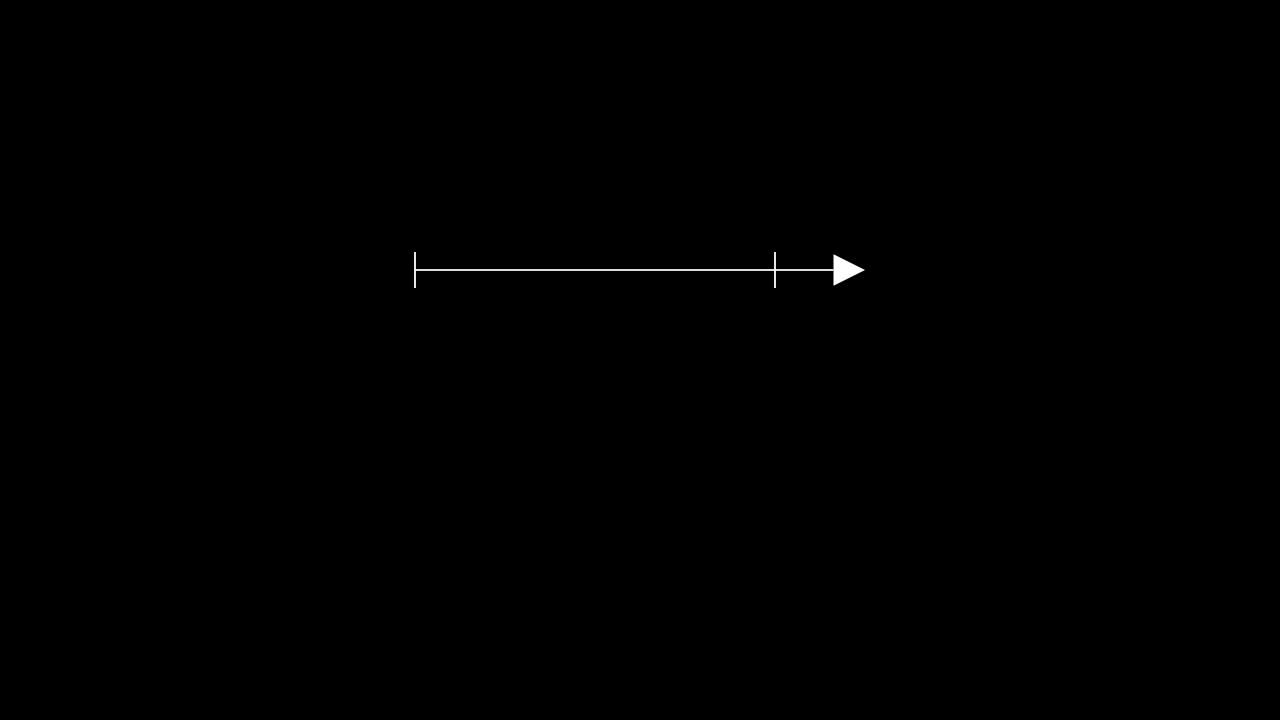

In [4]:
%%manim -qm --fps 60 $video_scene


class talbot_carpet_Scene(Scene):
	def construct(self):
		self.camera.background_color = background_color


		experimental_setup = ExperimentalSetup()
		self.add(experimental_setup)